### Step 1: Install and Import Libraries

In [82]:
# Data processing
import numpy as np
import pandas as pd

# Get time series data
import yfinance as yf

# Prophet model for time series forecast
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from datetime import timedelta
import os
from pandas.tseries.offsets import MonthBegin, MonthEnd
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Model performance evaluation
import sklearn
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Hyperparameter tuning
import itertools
from prophet.diagnostics import cross_validation, performance_metrics
import platform
from pandas.tseries.offsets import MonthBegin
from pandas.tseries.offsets import MonthEnd

from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

#Standard libraries for data analysis:----------------------
    
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



### Data Source - Retail Sales

Retail Sales:
https://www.census.gov/retail/marts/historic_releases.html

CPI:
https://fred.stlouisfed.org/series/CPIAUCSL

M1:
https://fred.stlouisfed.org/series/M1SL

M2:
https://fred.stlouisfed.org/series/M2SL

Inflation:
https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL

CLI, BCI, and CCI
https://data.oecd.org/leadind/composite-leading-indicator-cli.htm#indicator-chart

### Step 2: Pull Data

In [85]:
dir = os.chdir(r"C:/Users/tleer/Python Projects/GitHub Projects/Facebook Prophet Example")
path = "C:/Users/tleer/Python Projects/GitHub Projects/Facebook Prophet Example"

retail_sales_all = pd.read_excel(f'{path}/Data/mrtssales92-apr2023_2.xlsx',sheet_name='Total')
retail_sales_2020 = pd.read_excel(f'{path}/Data/mrtssales92-apr2023_2.xlsx',sheet_name='Total')

In [86]:
retail_sales_all.head(10)

,month,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
0,2005-01-01,293261,2.315890,191.6,1367.1,6424.5,100.5,100.7,101.1
1,2005-02-01,295062,2.286245,192.4,1371.1,6432.8,100.5,100.5,100.9
2,2005-03-01,339141,2.246153,193.1,1370.9,6441.9,100.4,100.3,100.7
3,2005-04-01,335632,2.239722,193.7,1358.4,6455.9,100.3,100.1,100.5
4,2005-05-01,345348,2.357955,193.6,1366.0,6473.3,100.3,100.0,100.6
5,2005-06-01,350945,2.199355,193.7,1380.1,6505.8,100.3,100.1,100.8
6,2005-07-01,351827,2.301079,194.9,1369.0,6537.4,100.4,100.4,100.7
7,2005-08-01,355701,2.264406,196.1,1377.8,6570.2,100.5,100.5,100.1
8,2005-09-01,333289,2.334076,198.8,1378.6,6604.3,100.6,100.8,99.4
9,2005-10-01,336134,2.325302,199.1,1376.5,6638.6,100.7,100.9,99.2


In [87]:
retail_sales_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           220 non-null    datetime64[ns]
 1   sales_tot       220 non-null    int64         
 2   inflation_rate  220 non-null    float64       
 3   cpi             220 non-null    float64       
 4   m1              220 non-null    float64       
 5   m2              220 non-null    float64       
 6   cli             220 non-null    float64       
 7   bci             220 non-null    float64       
 8   cci             220 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 15.6 KB


In [88]:
#retail_sales_all.reset_index(inplace = True)
retail_sales_all['month'] = pd.to_datetime(retail_sales_all['month']) + MonthEnd(1)
retail_sales_all.set_index(['month'], inplace = True)
retail_sales_all['sales_tot'] = retail_sales_all['sales_tot'].astype(int)
#retail_sales_all.index = pd.to_datetime(retail_sales_all.index)
retail_sales_all = retail_sales_all.loc['2005-01-01':'2019-12-31']


retail_sales_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-31 to 2019-12-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_tot       180 non-null    int32  
 1   inflation_rate  180 non-null    float64
 2   cpi             180 non-null    float64
 3   m1              180 non-null    float64
 4   m2              180 non-null    float64
 5   cli             180 non-null    float64
 6   bci             180 non-null    float64
 7   cci             180 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 12.0 KB


In [89]:
## This will be used as a future dataset to analyze the performance of this model.

#retail_sales_all.reset_index(inplace = True)
retail_sales_2020['month'] = pd.to_datetime(retail_sales_2020['month']) + MonthEnd(1)
retail_sales_2020.set_index(['month'], inplace = True)
retail_sales_2020['sales_tot'] = retail_sales_2020['sales_tot'].astype(int)
#retail_sales_all.index = pd.to_datetime(retail_sales_all.index)
retail_sales_2020 = retail_sales_2020.loc['2020-01-01':'2020-12-31']


retail_sales_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-31 to 2020-12-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_tot       12 non-null     int32  
 1   inflation_rate  12 non-null     float64
 2   cpi             12 non-null     float64
 3   m1              12 non-null     float64
 4   m2              12 non-null     float64
 5   cli             12 non-null     float64
 6   bci             12 non-null     float64
 7   cci             12 non-null     float64
dtypes: float64(7), int32(1)
memory usage: 816.0 bytes


In [90]:
retail_sales_all.head()

,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
month,,,,,,,,
2005-01-31,293261,2.315890,191.6,1367.1,6424.5,100.5,100.7,101.1
2005-02-28,295062,2.286245,192.4,1371.1,6432.8,100.5,100.5,100.9
2005-03-31,339141,2.246153,193.1,1370.9,6441.9,100.4,100.3,100.7
2005-04-30,335632,2.239722,193.7,1358.4,6455.9,100.3,100.1,100.5
2005-05-31,345348,2.357955,193.6,1366.0,6473.3,100.3,100.0,100.6


In [91]:
retail_sales_2020.head()

,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
month,,,,,,,,
2020-01-31,480837,2.797067,259.037,3978.6,15396.0,99.1,99.1,101.6
2020-02-29,479584,2.812936,259.248,3981.4,15450.3,99.1,99.0,101.2
2020-03-31,476288,2.647379,258.124,4261.0,15978.7,97.7,98.6,100.2
2020-04-30,408280,2.226352,256.092,4794.5,16997.6,92.6,98.1,99.1
2020-05-31,505991,2.084208,255.868,16244.2,17851.1,94.3,98.4,98.6


### Step 3: Stationary Test

In [92]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(retail_sales_train.sales_tot.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: 0.1813843111074906
ADF p-values: 0.9711979549165912
ADF number of lags used: 14
ADF number of observations: 165
ADF critical values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}
ADF best information criterion: 3471.8754440958874


### Step 4: Prep Dataset

In [94]:
#retail_sales = retail_sales_all.filter(["month","sales_total"])
#retail_sales_regressors = retail_sales_all.filter(["month", "inflation_rate", "cpi", "m1", "m2", "cli", "bci", "cci"])

retail_sales = retail_sales_all.filter(["month","sales_tot","inflation_rate", "cpi", "m1", "m2", "cli", "bci", "cci"])

In [95]:
retail_sales.head()

,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
month,,,,,,,,
2005-01-31,293261,2.315890,191.6,1367.1,6424.5,100.5,100.7,101.1
2005-02-28,295062,2.286245,192.4,1371.1,6432.8,100.5,100.5,100.9
2005-03-31,339141,2.246153,193.1,1370.9,6441.9,100.4,100.3,100.7
2005-04-30,335632,2.239722,193.7,1358.4,6455.9,100.3,100.1,100.5
2005-05-31,345348,2.357955,193.6,1366.0,6473.3,100.3,100.0,100.6


In [96]:
# Change variable names
retail_sales = retail_sales.reset_index()
#retail_sales.columns = ['ds', 'sales_tot', 'cpi']

# Take a look at the data
retail_sales.head()

,month,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
0,2005-01-31,293261,2.315890,191.6,1367.1,6424.5,100.5,100.7,101.1
1,2005-02-28,295062,2.286245,192.4,1371.1,6432.8,100.5,100.5,100.9
2,2005-03-31,339141,2.246153,193.1,1370.9,6441.9,100.4,100.3,100.7
3,2005-04-30,335632,2.239722,193.7,1358.4,6455.9,100.3,100.1,100.5
4,2005-05-31,345348,2.357955,193.6,1366.0,6473.3,100.3,100.0,100.6


### Step 5: Multicollinearity Tests

In [ ]:
# Check correlation
#retail_sales.corrwith(retail_sales["y"])

In [97]:
print("")
def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)


In [98]:
dataset2 = retail_sales[[
                         "cpi",
                         "inflation_rate",
                         "m1",
                         "m2"
                         ,"cli"
                         ,"bci"
                         ,"cci"
                        ]]
print(calc_vif(dataset2))
print("")

        variables           VIF
0             cpi  11350.321567
1  inflation_rate     42.821580
2              m1   1941.594299
3              m2   8049.300949
4             cli  17951.533894
5             bci  32249.191129
6             cci  22243.046125



In [99]:
## Remove All Variables until VIF is around 5 or less
dataset2 = retail_sales[[
                         #"cpi",
                         "inflation_rate"
                         ,"m1"
                         #,"m2"
                         #,"cli"
                         #,"bci"
                         #,"cci"
                        ]]
print(calc_vif(dataset2))
print("")

        variables       VIF
0  inflation_rate  6.010596
1              m1  6.010596



### Step 6: Making New Dataset Post-Multicollinearity Test

In [100]:
retail_sales = retail_sales[[
                         "month",
                         "sales_tot",
                         "inflation_rate",
                         "m1"
                         #,"cli"
                        ]]

retail_sales = retail_sales.rename(columns={'sales_tot':'y', 'month':'ds'})

In [101]:
retail_sales.tail()

,ds,y,inflation_rate,m1
175,2019-08-31,540871,2.629246,3855.3
176,2019-09-30,491987,2.606767,3899.5
177,2019-10-31,521331,2.733341,3933.1
178,2019-11-30,531446,2.768217,3949.5
179,2019-12-31,586647,2.746361,4021.2


<Axes: ylabel='Rate (%)'>

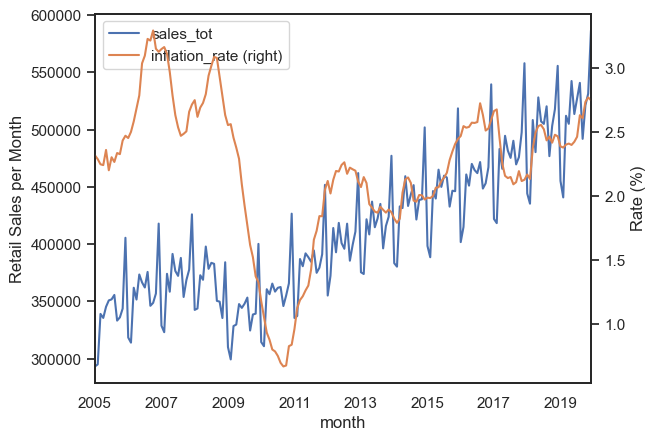

<Figure size 1000x500 with 0 Axes>

In [102]:
fig, ax = plt.subplots()
plt.figure(figsize=(10, 5))

retail_sales_all.reset_index().plot(x = 'month', y = 'sales_tot', ax = ax, ylabel="Retail Sales per Month")
retail_sales_all.reset_index().plot(x = 'month', y = 'inflation_rate', ax = ax, secondary_y = True, ylabel="Rate (%)") 

<Axes: ylabel='M2 ($ Billions)'>

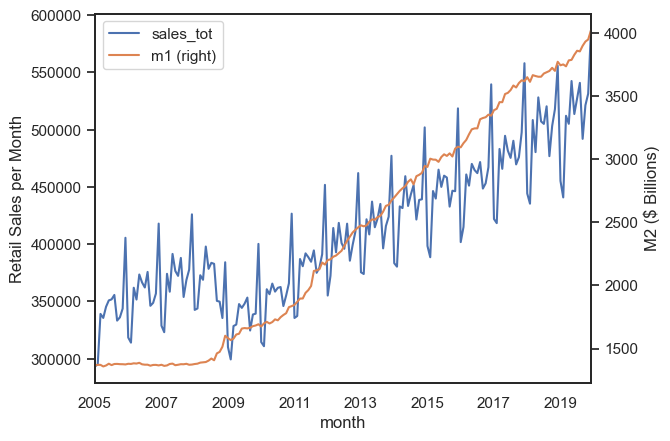

<Figure size 1000x500 with 0 Axes>

In [103]:
fig, ax = plt.subplots() 
plt.figure(figsize=(10, 5))


retail_sales_all.reset_index().plot(x = 'month', y = 'sales_tot', ax = ax, ylabel="Retail Sales per Month") 
retail_sales_all.reset_index().plot(x = 'month', y = 'm1', ax = ax, secondary_y = True, ylabel="M2 ($ Billions)") 

### Step 7: Train Test Split

In [105]:
train_start = '2005-01-01'
test_start = '2018-01-01'
test_end = '2019-12-31'

# Train test split
train = retail_sales[retail_sales['ds'] < test_start]
test = retail_sales[(retail_sales['ds'] >= test_start) & (retail_sales['ds'] <= test_end)]

# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(train), 'records, ranging from', train['ds'].min(), 'to', train['ds'].max())
print('The testing dataset has', len(test), 'records, ranging from', test['ds'].min(), 'to', test['ds'].max())

The training dataset has 156 records, ranging from 2005-01-31 00:00:00 to 2017-12-31 00:00:00
The testing dataset has 24 records, ranging from 2018-01-31 00:00:00 to 2019-12-31 00:00:00


In [106]:
train.tail()

,ds,y,inflation_rate,m1
151,2017-08-31,490308,2.089832,3585.1
152,2017-09-30,469678,2.106697,3569.3
153,2017-10-31,475986,2.192819,3604.4
154,2017-11-30,497665,2.115031,3626.2
155,2017-12-31,558025,2.125472,3618.8


### Step 8: Baseline Model

In [107]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)


15:54:39 - cmdstanpy - INFO - Chain [1] start processing
15:54:39 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=24, freq='M')
#future_baseline = model_baseline.make_future_dataframe(periods=4, freq='M')

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Check the forecasted values and upper/lower bound
print(forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print(forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

          ds           yhat     yhat_lower     yhat_upper
0 2005-01-31  295837.861325  287662.521277  304003.707543
1 2005-02-28  297580.951759  288382.399123  306053.712323
2 2005-03-31  342863.458026  334076.462051  351012.314898
3 2005-04-30  334252.259470  325408.047538  342759.676915
4 2005-05-31  357213.319293  349135.866924  366104.027003
            ds           yhat     yhat_lower     yhat_upper
175 2019-08-31  520238.341385  506216.027356  534178.148941
176 2019-09-30  494388.347051  478646.645955  509673.302463
177 2019-10-31  505667.367481  489499.349063  520293.047181
178 2019-11-30  513239.835607  497386.488273  530082.452066
179 2019-12-31  574823.041573  558657.676873  593840.870586


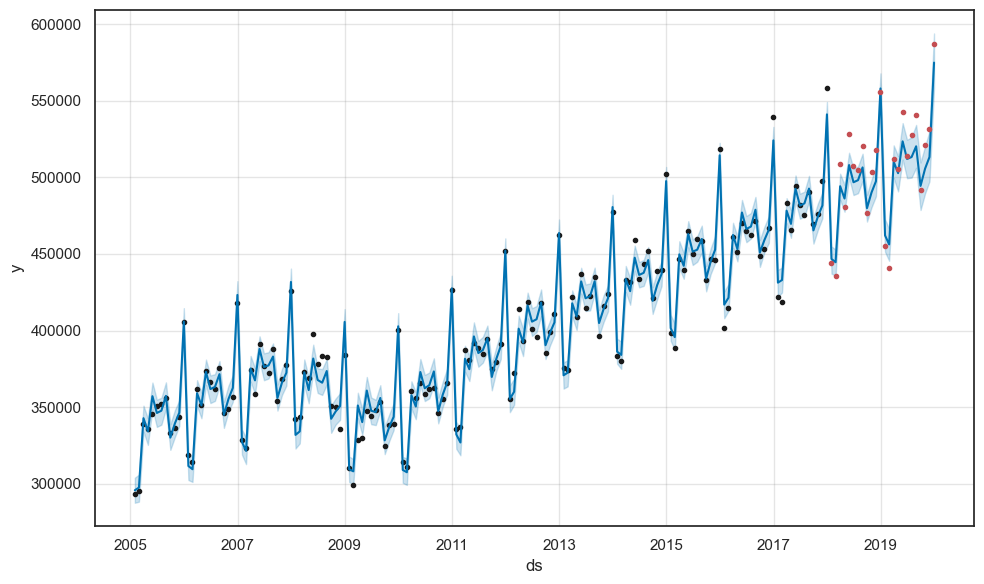

In [109]:
# Visualize the forecast
fig = model_baseline.plot(forecast_baseline);
ax = fig.gca()
ax.plot( test["ds"], test["y"], 'r.')

### Step 9: Cross-Validation and Model Performance

In [110]:
# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(train), 'records, ranging from', train['ds'].min(), 'to', train['ds'].max())
print('The testing dataset has', len(test), 'records, ranging from', test['ds'].min(), 'to', test['ds'].max())

The training dataset has 156 records, ranging from 2005-01-31 00:00:00 to 2017-12-31 00:00:00
The testing dataset has 24 records, ranging from 2018-01-31 00:00:00 to 2019-12-31 00:00:00


In [111]:
# Cross validation
df_cv = cross_validation(model_baseline, initial='1825 days', period='365 days', horizon = '2190 days'\
                         , parallel="processes")
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-01-31,332083.309169,327662.599050,336951.618733,335587,2011-01-02
1,2011-02-28,323543.777920,318545.300573,328692.568130,337314,2011-01-02
2,2011-03-31,379442.282523,373979.190705,384448.551151,387088,2011-01-02
3,2011-04-30,368583.183008,363210.384126,373978.342636,380775,2011-01-02
4,2011-05-31,392574.731867,386876.863494,398463.624121,391999,2011-01-02


In [112]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
139,2017-08-31,551977.742045,383181.762601,709275.383952,490308,2012-01-02
140,2017-09-30,527513.916185,355653.753160,689578.775193,469678,2012-01-02
141,2017-10-31,535573.718211,358532.332810,701611.008552,475986,2012-01-02
142,2017-11-30,538528.136047,360949.817212,707285.761123,497665,2012-01-02
143,2017-12-31,598714.580490,414336.616178,769660.004918,558025,2012-01-02


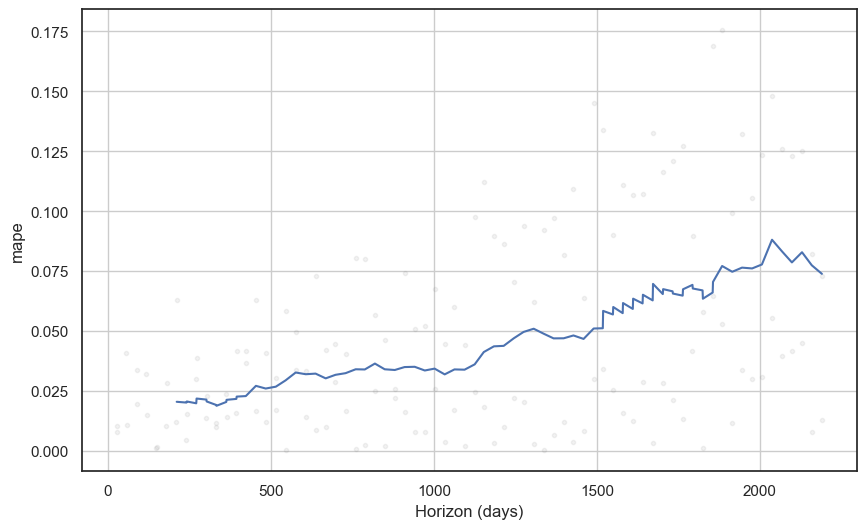

In [113]:
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [114]:
# Model performance metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,211 days,1.042530e+08,10210.437947,7870.669166,0.020549,0.013584,0.020544,0.500000
1,241 days,1.037718e+08,10186.842933,7775.110793,0.020224,0.013584,0.020218,0.500000
2,242 days,1.060713e+08,10299.090686,8014.882641,0.020682,0.015333,0.020667,0.500000
3,271 days,1.016363e+08,10081.483281,7837.930850,0.019917,0.015333,0.019874,0.500000
4,272 days,1.163217e+08,10785.253120,8613.484212,0.021902,0.017645,0.021802,0.428571


In [115]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-24:], on='ds')

## Average Y value 
y_avg = test.loc[:, 'y'].mean()
print(f'The Average Y Value is {y_avg}')

# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')

# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The Average Y Value is 506343.7916666667
The MAE for the baseline model is 10498.829589846197
The MAPE for the baseline model is 0.02052794329907362


### Step 10: Predict on Future Dataset

In [116]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=36, freq='M')
#future_baseline = model_baseline.make_future_dataframe(periods=4, freq='M')

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Check the forecasted values and upper/lower bound
#print(forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print(forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


            ds           yhat     yhat_lower     yhat_upper
180 2020-01-31  477403.513159  460034.313569  495204.217635
181 2020-02-29  481908.316646  463124.329333  499389.470507
182 2020-03-31  522845.529693  503858.246951  541823.992338
183 2020-04-30  513545.329564  494566.537141  531115.742002
184 2020-05-31  537497.346670  517047.943691  557278.673877
185 2020-06-30  526752.320727  506454.410168  548844.665816
186 2020-07-31  528326.906930  507286.278710  550130.410070
187 2020-08-31  539299.785981  515484.469524  562879.386042
188 2020-09-30  511386.370997  486731.067181  535499.320178
189 2020-10-31  519551.963453  493899.221889  545063.169836
190 2020-11-30  526279.794335  501504.237402  552886.126137
191 2020-12-31  584535.691836  557529.696568  612220.573792


In [117]:
df_2020 = forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print(df_2020)

            ds           yhat     yhat_lower     yhat_upper
180 2020-01-31  477403.513159  460034.313569  495204.217635
181 2020-02-29  481908.316646  463124.329333  499389.470507
182 2020-03-31  522845.529693  503858.246951  541823.992338
183 2020-04-30  513545.329564  494566.537141  531115.742002
184 2020-05-31  537497.346670  517047.943691  557278.673877
185 2020-06-30  526752.320727  506454.410168  548844.665816
186 2020-07-31  528326.906930  507286.278710  550130.410070
187 2020-08-31  539299.785981  515484.469524  562879.386042
188 2020-09-30  511386.370997  486731.067181  535499.320178
189 2020-10-31  519551.963453  493899.221889  545063.169836
190 2020-11-30  526279.794335  501504.237402  552886.126137
191 2020-12-31  584535.691836  557529.696568  612220.573792


In [118]:
retail_sales_2020.head(12)

,sales_tot,inflation_rate,cpi,m1,m2,cli,bci,cci
month,,,,,,,,
2020-01-31,480837,2.797067,259.037,3978.6,15396.0,99.1,99.1,101.6
2020-02-29,479584,2.812936,259.248,3981.4,15450.3,99.1,99.0,101.2
2020-03-31,476288,2.647379,258.124,4261.0,15978.7,97.7,98.6,100.2
2020-04-30,408280,2.226352,256.092,4794.5,16997.6,92.6,98.1,99.1
2020-05-31,505991,2.084208,255.868,16244.2,17851.1,94.3,98.4,98.6
2020-06-30,533784,2.058146,256.986,16559.7,18131.7,96.1,99.3,98.5
2020-07-31,549955,2.348857,258.278,16767.2,18286.3,97.7,100.0,98.6
2020-08-31,546744,2.288978,259.411,16878.5,18346.0,98.4,100.5,98.8
2020-09-30,531870,2.077391,260.029,17158.6,18577.3,98.7,100.8,99.1


In [119]:
pred_actual = pd.merge(df_2020,retail_sales_2020, right_on="month",left_on="ds")

pred_actual["yhat"] = pred_actual["yhat"].round(0)
pred_actual["Difference between Actual and Predicted Sales"] = pred_actual["sales_tot"] - pred_actual["yhat"]
pred_actual["Absolute Difference between Actual and Predicted Sales"] = abs(pred_actual["Difference between Actual and Predicted Sales"])
pred_actual = pred_actual.rename(columns={"ds":"Month","sales_tot":"Actual Sales Total","yhat":"Predicted Sales Total"})

pred_actual.head()

,Month,Predicted Sales Total,yhat_lower,yhat_upper,Actual Sales Total,inflation_rate,cpi,m1,m2,cli,bci,cci,Difference between Actual and Predicted Sales,Absolute Difference between Actual and Predicted Sales
0,2020-01-31,477404.0,460034.313569,495204.217635,480837,2.797067,259.037,3978.6,15396.0,99.1,99.1,101.6,3433.0,3433.0
1,2020-02-29,481908.0,463124.329333,499389.470507,479584,2.812936,259.248,3981.4,15450.3,99.1,99.0,101.2,-2324.0,2324.0
2,2020-03-31,522846.0,503858.246951,541823.992338,476288,2.647379,258.124,4261.0,15978.7,97.7,98.6,100.2,-46558.0,46558.0
3,2020-04-30,513545.0,494566.537141,531115.742002,408280,2.226352,256.092,4794.5,16997.6,92.6,98.1,99.1,-105265.0,105265.0
4,2020-05-31,537497.0,517047.943691,557278.673877,505991,2.084208,255.868,16244.2,17851.1,94.3,98.4,98.6,-31506.0,31506.0


In [120]:
pred_actual[["Month","Actual Sales Total","Predicted Sales Total"\
             ,"Difference between Actual and Predicted Sales",\
             "Absolute Difference between Actual and Predicted Sales"]].head(12)

,Month,Actual Sales Total,Predicted Sales Total,Difference between Actual and Predicted Sales,Absolute Difference between Actual and Predicted Sales
0,2020-01-31,480837,477404.0,3433.0,3433.0
1,2020-02-29,479584,481908.0,-2324.0,2324.0
2,2020-03-31,476288,522846.0,-46558.0,46558.0
3,2020-04-30,408280,513545.0,-105265.0,105265.0
4,2020-05-31,505991,537497.0,-31506.0,31506.0
5,2020-06-30,533784,526752.0,7032.0,7032.0
6,2020-07-31,549955,528327.0,21628.0,21628.0
7,2020-08-31,546744,539300.0,7444.0,7444.0
8,2020-09-30,531870,511386.0,20484.0,20484.0
9,2020-10-31,554129,519552.0,34577.0,34577.0


In [121]:
print(pred_actual["Absolute Difference between Actual and Predicted Sales"].mean().round(0))
print(pred_actual["Actual Sales Total"].mean().round(0))

27106.0
518608.0
